In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

## Config

In [2]:

# Matplotlib Config
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

In [3]:
# Pandas and numpy config
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns',10)
pd.set_option('display.width', 100)

# Warnings Config

warnings.filterwarnings('ignore')

## Helper Functions

In [29]:
def plot_distribution(data, column_name):
    sns.distplot(x=data[column_name])
    plt.xlabel(column_name, size=14)
#     plt.axvline(x=data[column_name].median(),
#             color='blue',
#             ls='--', 
#             lw=1.5)
#     plt.axvline(x=data[column_name].mean(),
#             color='red',
#             ls='--', 
#             lw=1.5)
    plt.title("Distribution of {}".format(column_name))
    plt.ylabel("Count", size=14)
    plt.show()


def plot_boxplot(data, column_name):
    sns.boxplot(x=data[column_name])
    plt.xlabel(column_name, size=14)
    plt.title("Boxplot of {}".format(column_name))
    plt.ylabel("Count", size=14)
    plt.show()

## Reading Data

In [5]:
data = pd.read_csv("./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [7]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [8]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.500,50.079,849.092,3145.128,8.787
std,1443.520,29.006,87.799,41282.539,116.320
min,1.000,1.000,607.000,90.000,1.000
25%,1250.750,24.000,775.000,163.000,1.000
50%,2500.500,50.000,849.000,284.000,2.000
75%,3750.250,75.000,925.000,390.000,3.000
max,5000.000,100.000,999.000,704000.000,2000.000


In [9]:
data.shop_id.value_counts()

53    68
71    66
19    64
13    63
89    61
      ..
74    38
56    37
67    37
38    35
85    35
Name: shop_id, Length: 100, dtype: int64

## Data Transformation

In [10]:
data['created_at'] = pd.to_datetime(data.created_at, format='%Y-%m-%d %H:%M:%S')

In [11]:
data.created_at.min(), data.created_at.max()

(Timestamp('2017-03-01 00:08:09'), Timestamp('2017-03-30 23:55:35'))

## Analysis of Average Order Value

As per definition of Average Order Value given [here](https://www.shopify.ie/blog/average-order-value#averageorder) in shopify blog

In [12]:
np.round(data.order_amount.mean(),2)

3145.13

The average order value for the sneakers seems unreasonably high. Let's check the unique values in "order_amount" column and probability distribution of "order_amount" column.

In [13]:
data.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

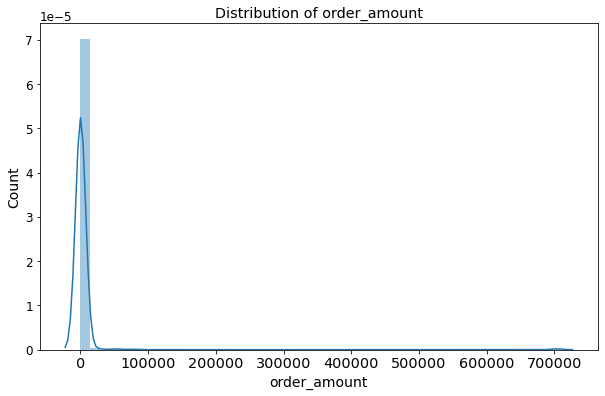

In [14]:
plot_distribution(data, 'order_amount')

The order amount is extremely right skewed, it is not normal. Seems like order_amount has some outliers.

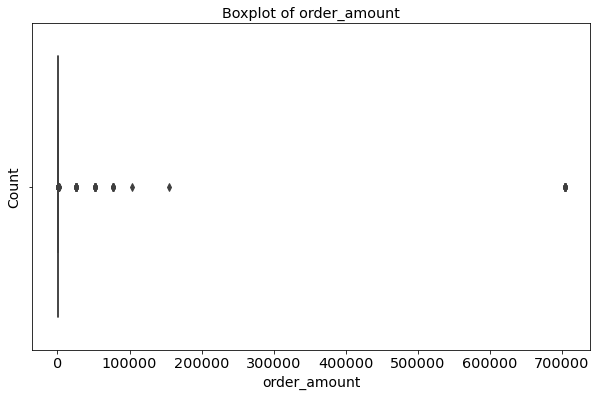

In [30]:
plot_boxplot(data, 'order_amount')

In the boxplot we can observe that there are very large outliers, the quantiles are not visible to the scale of large outliers

Let's check the total items column

In [15]:
data.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

It seems there are 17 records with "2000" order items. It is very unlikely for a common person to by "2000" sneakers shoe in one order. It could be a faultly data entry.

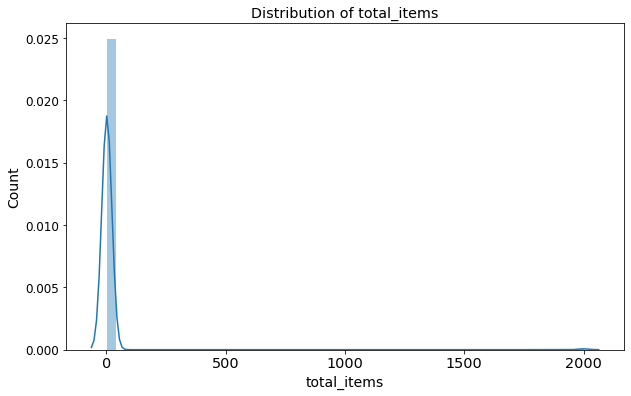

In [16]:
# sns.distplot(x = data.total_items)
# plt.show()

plot_distribution(data, 'total_items')

As there are few orders with "2000" total item count, the total_items column distribution is also skewed.

### Let' verify the order_amount by stores

In [17]:
data.sort_values(by = ['order_amount'], ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 09:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 02:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 09:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [18]:
data.sort_values(by = ['order_amount'], ascending = False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00


When the data is sorted by "order_amount" we can see high order amount values belong to specific shop_ids. Let's groupby the data by shop_ids to see if there is a pattern

In [19]:
data.groupby(['shop_id'])['order_amount'].mean().reset_index().sort_values(by=['order_amount'], ascending=False)

,shop_id,order_amount
41,42,235101.490
77,78,49213.043
49,50,403.545
89,90,403.224
37,38,390.857
...,...,...
52,53,214.118
99,100,213.675
31,32,189.976
1,2,174.327


It is clear that data from shop 42 and 78 is abnormally high. Let's observe each one of them carefully.

In [20]:
data[data.shop_id == 42].head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


We can observe that for shop 42 and user 607 the data is abnormal, as it says they ordered 2000 sneakers on multiple days. It could be possible that this shop also takes bulk order from small businesses. However, this is definitely an outlier. 

In [21]:
data[data.shop_id == 78].head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20


We can observe that for shop 78, the order amounts are abnormally high. It is possible that it is a premium sneaker store. However, this suggests it is an outlier when compared to sneakers bought by general public.

#### Insights and Conclusion

* We observed that the Average Order Value of '3145.13' was abnormally high. We observed that the distribution on order_amount was extremely right skewed which is again abnormal.

* Then we analysed the data, specifically columns order_amount, total_items and shop_ids. 

* We observed that shops with id 42 has abnormally high order amount values for customer with id 607 who has ordered 2000 items per order multiple times. Shop with id 78 has all its orders extremely high compared to majority of the shops.

* Let's discuss the possible solutions to find proper metric for average order value.

## Solution

### Approach One - Use Median Order Value Metric

A more resonable metric would be to use "Median order value". This is because mean is a good metric for normally distributed data. But as we observed our data is right skewed in which case median would be a better measure of central tendency.

In [22]:
np.round(data.order_amount.median(),2)

284.0

### Approach One - Remove Outliers and Use Average Order Value

We observed earlier that shop 42 and 78 are potential outliers

In [23]:
shop_id_counts_df = data.shop_id.value_counts().rename_axis('shop_id').reset_index(name='counts')
shop_id_counts_df[shop_id_counts_df.shop_id.isin([42, 78])]

,shop_id,counts
46,42,51
68,78,46


We can observe that shop_id 42 and 78 have total "97" records out of 5000 orders.

In [24]:
ratio_of_outliers = 97/5000
print("The ratio of outliers is: ",ratio_of_outliers)

The ratio of outliers is:  0.0194


As the outliers are less than 2% we can remove them and then see if the distribution is normal.

In [25]:
data_filtered = data[~data.shop_id.isin([42,78])].copy()

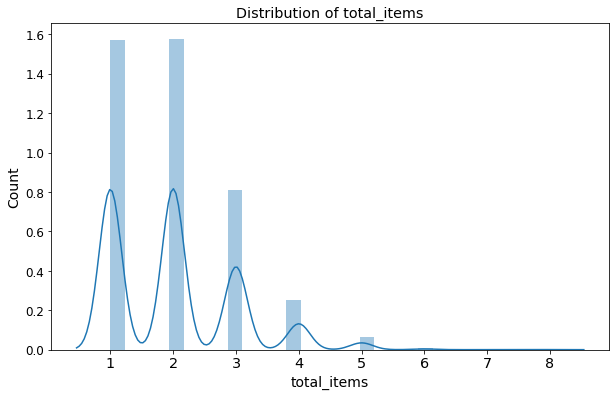

In [26]:
# sns.distplot(x = data_filtered.total_items)
plot_distribution(data_filtered, 'total_items')

Distribution of total items looks more realistic with lowest order quanity 1 and highest order quantity 8. 

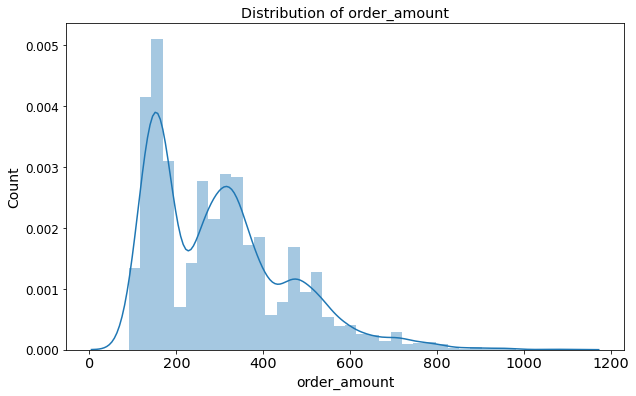

In [27]:
# sns.distplot(x = data_filtered.order_amount)
# plt.show()
plot_distribution(data_filtered, 'order_amount')

Now the distribution of order amount looks more realistic and close to normal distribution.

In [28]:
np.round(data_filtered.order_amount.mean(),2)

300.16

The Average order value after removing outliers is 300.16 which is very close to the Median order value. These results make much more sense.

## Conclusion

From the analysis it was observed that the data has ouliers hence the metric average order value (AOV) was giving unrealistic values. 

I have discussed above two solution approaches to solve this issue:

* 1) Use Median Order Value (MOV) as a metric as it works well for skewed data, this way we don't have to remove outliers. The Median Order value for given data is 284.

* 2) Remove outlier shop id 42 and 78 and then calculate the Average Order Value (AOV). The Average order value after removing outlier comes around 300.16.

## References

* 1) https://www.shopify.ie/blog/basic-ecommerce-metrics
* 2) https://www.shopify.ie/blog/average-order-value#better